In [0]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
##
##
MM = 3
GG = 27
rho = 1.225 ## kg/m^3
##
massa = 5500.0-10/GG ## kg
S = 20-GG/10 ## m^2
CLmax = 1.7+MM/100
CD0 = 0.025+MM/1000
k = 0.045+MM/1000
W = massa*9.81 ## N
##
print("CLMax",CLmax,"CD0 =",CD0,"k =",k)
##
tmp1 = np.linspace(0,CLmax,6)
##tmp1 = np.arange(0,CLmax,0.1)
tmp2 = [sqrt(CD0/(3*k)),sqrt(CD0/k),sqrt(3*CD0/k)]
CLs = []
for i in range(len(tmp1)):
	CLs.append(tmp1[i])
for i in range(len(tmp2)):
	CLs.append(tmp2[i])
##
CLs.sort()
CD = []
CD1 = []
CD2 = []
E = []
iq = []
qi = []
##
V = []
D = []
D1 = []
D2 = []
##
for i in range(len(CLs)):
  CD.append(CD0+k*CLs[i]**2)
  CD1.append(CD0)
  CD2.append(k*CLs[i]**2)
  E.append(CLs[i]/CD[i])
  iq.append(E[i]*sqrt(CLs[i]))
  if CLs[i]==0:
    qi.append(np.nan)
    V.append(np.nan)
    D.append(np.nan)
    D1.append(np.nan)
    D2.append(np.nan)
    
  else:
    qi.append(E[i]/sqrt(CLs[i]))
    V.append(sqrt(2*W/S/(rho*CLs[i])))
    D.append(0.5*rho*V[i]**2*S*CD[i])
    D1.append(0.5*rho*V[i]**2*S*CD1[i])
    D2.append(0.5*rho*V[i]**2*S*CD2[i])
    
##
data = {"CL":CLs,"CD1":CD1,"CD2":CD2,"CD":CD,"E":E,"iq":iq,"qi":qi,"IAS":V,"D1":D1,"D2":D2,"D":D}
df = pd.DataFrame(data)
##print(df)
df

CLMax 1.73 CD0 = 0.028 k = 0.048


,CL,CD1,CD2,CD,E,iq,qi,IAS,D1,D2,D
0,0.000000,0.028,0.000000,0.028000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,0.346000,0.028,0.005746,0.033746,10.252955,6.030969,17.430547,121.307339,4366.006551,896.024298,5262.030849
2,0.440959,0.028,0.009333,0.037333,11.811390,7.843319,17.786976,107.454904,3425.805578,1141.935193,4567.740771
3,0.692000,0.028,0.022985,0.050985,13.572494,11.290488,16.315734,85.777242,2183.003276,1792.048595,3975.051871
4,0.763763,0.028,0.028000,0.056000,13.638618,11.919268,15.605985,81.648071,1977.889773,1977.889773,3955.779546
5,1.038000,0.028,0.051717,0.079717,13.021011,13.266104,12.780447,70.036825,1455.335517,2688.072893,4143.408410
6,1.322876,0.028,0.084000,0.112000,11.811390,13.585027,10.269315,62.039118,1141.935193,3425.805578,4567.740771
7,1.384000,0.028,0.091942,0.119942,11.538921,13.574794,9.808377,60.653670,1091.501638,3584.097190,4675.598828
8,1.730000,0.028,0.143659,0.171659,10.078108,13.255682,7.662244,54.250291,873.201310,4480.121488,5353.322798


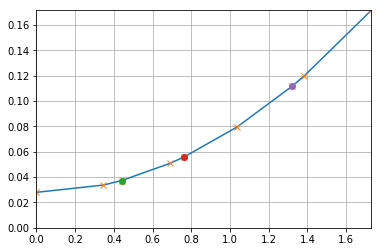

In [0]:
plt.plot(CLs,CD)
plt.plot(CLs,CD,"x")
plt.plot(tmp2[0],CD[CLs.index(tmp2[0])],"o")
plt.plot(tmp2[1],CD[CLs.index(tmp2[1])],"o")
plt.plot(tmp2[2],CD[CLs.index(tmp2[2])],"o")
plt.xlim(0,max(CLs))
plt.ylim(0,max(CD))
plt.grid()
plt.show()

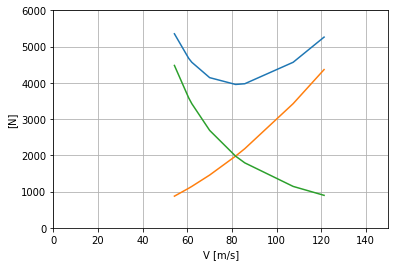

In [0]:
plt.plot(V,D)
plt.plot(V,D1)
plt.plot(V,D2)
plt.xlim(0,150)
plt.xlabel("V [m/s]")
plt.ylim(0,6000)
plt.ylabel("[N]")
plt.grid()
plt.show()